In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train = datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('data', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, 
                                       batch_size=10, 
                                       shuffle=True)
testset = torch.utils.data.DataLoader(test, 
                                      batch_size=10, 
                                      shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### Loss and Optimizer
- Loss: Meausre of how wrong is our model
- Optimixer is torch.optim

#### Nuron Layers:
- initial few layer is having more genoralized
- subsequent layers can be very specific to adjust the weights 

In [5]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
# lr = Learning Rates dictates the size of the steps 
# to get to perfect (optimized to lower the loss rate)
# if the learning rates is large its never get to more 
# Acurazy of the predications.
# decaying learning rates: Starting with larger steps and 
# slowing down the further steps to smaller once
# Optimization curve
# 
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
for epoch in range(3): 
    # 3 full passes over the data
    for data in trainset:  
        # `data` is a batch of data
        X, y = data  
        # X is the batch of features, y is the batch 
        #of targets.
        net.zero_grad()  
        # sets gradients to 0 before loss calc. 
        #You will do this likely every step.
        output = net(X.view(-1,28*28))  
        # pass in the reshaped batch 
        #(recall they are 28x28 atm)
        # Measuring major loss 
        # One-hot-Vector and mean squared error
        # This mode is not single vector 
        # hence we are using one hot vector 
        loss = F.nll_loss(output, y)  
        # calc and grab the loss value
        loss.backward()  
        # apply this loss backwards thru 
        #the network's parameters
        optimizer.step()  
        # attempt to optimize weights to account for 
        #loss/gradients
    print(loss)  # print loss. 
    #We hope loss (a measure of wrong-ness) declines! 


tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.1199, grad_fn=<NllLossBackward>)
tensor(0.0124, grad_fn=<NllLossBackward>)


### How correct view?

In [7]:

correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.973


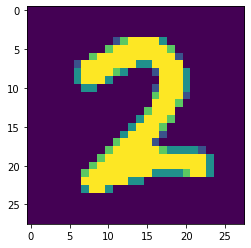

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[5].view(28,28))
plt.show()

In [18]:
print(torch.argmax(net(X[5].view(-1,28*28))[0]))


tensor(2)


In [19]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,28*28) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-3.6674e+01, -1.3950e+01, -1.4834e+01, -1.4947e+01, -2.1978e+01,
        -2.7728e+01, -4.2979e+01, -2.0266e-06, -2.1185e+01, -1.4512e+01],
       grad_fn=<SelectBackward>)


In [20]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
